In [12]:
import numpy as np
import matplotlib.pyplot as plt

def exp3(d,T,eta):
    e_loss = 0
    elv = 0.5*np.ones([d,2])
    elv[-2,:] = 0.4
    elv[-1,:] = [0.6,0.3]
    
    w_tilde = np.ones([d])
    
    for t in range(T):
        w = w_tilde/np.sum(w_tilde)
        adv_choice = np.random.choice(d,p=w)
        e_loss_c   = elv[adv_choice,(2*t)//T]
        l          = np.random.choice(2,p=[1-e_loss_c, e_loss_c])/w[adv_choice]
        e_loss    += e_loss_c
        w_tilde[adv_choice]    = w_tilde[adv_choice]*np.exp(-eta*l)

    return e_loss - 0.4*T

In [5]:
d = 10      #Number of advisors
T = 100000  #Number of rounds

c   = np.linspace(0.1,2.1,11)
Eta = c*np.sqrt(2.0*np.log(d)/(d*T))
n_samples=50
R   = np.zeros([11,n_samples])
for i,eta in enumerate(Eta):
    for trial in range(n_samples):
        R[i,trial] = exp3(d,T,eta)
        print("Sample: {}, i_c:{}".format(trial,i))

Sample: 0, i_c:0


KeyboardInterrupt: 

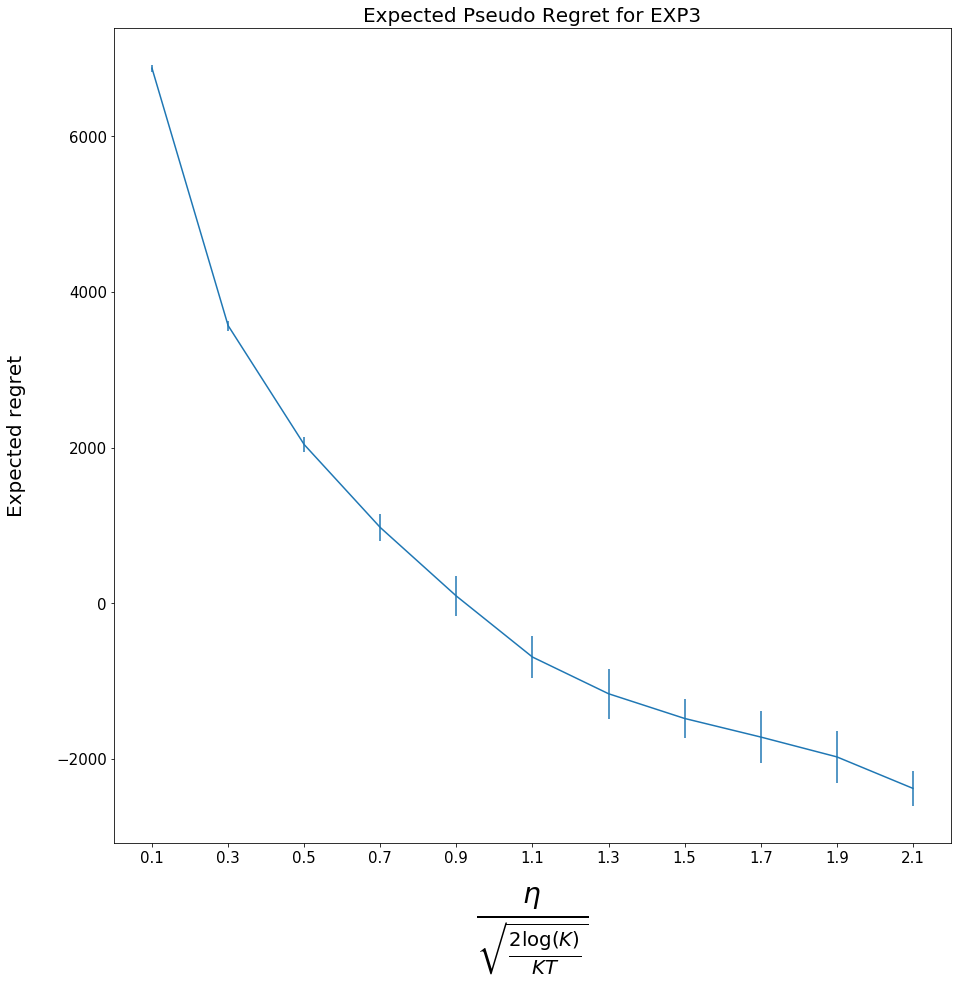

In [11]:
m, s = np.mean(R, axis=1), np.std(R, axis=1, ddof=1)*1.96/np.sqrt(50)
fig,ax = plt.subplots(figsize=(15,15))
ax.errorbar(c,m,s)
ax.set_xticks(c)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel(r"$\frac{\eta}{\sqrt{\frac{2\log(K)}{KT}}}$", fontsize=40, labelpad=20)
ax.set_ylabel(r"Expected regret", fontsize=20, labelpad=30)
ax.set_title('Expected Pseudo Regret for EXP3', fontsize=20)
plt.savefig("q2a.png")
plt.show()

In [27]:
np.save('exp_r.np', R)
np.save('exp_c.np', c)
np.save('exp_eta.np', Eta)